In [1]:
import pyportlib
pyportlib.set_client_dir()

update = False
# update = True


## Loading portfolio and benchmark

In [2]:
ptf = pyportlib.Portfolio(account='questrade_tfsa', currency="CAD")
benchmark = pyportlib.Portfolio(account='bench_tfsa', currency='CAD')

q = pyportlib.QuestradeConnection(account_name='tfsa')

In [3]:
if update:
    q.update_transactions(ptf)
    ptf.update_data(fundamentals_and_dividends=False)
    benchmark.update_data(fundamentals_and_dividends=False)

In [4]:
ptf_rets = ptf.pct_daily_total_pnl(start_date=ptf.start_date, include_cash=False).dropna()
bench_rets = benchmark.pct_daily_total_pnl(start_date=ptf.start_date, include_cash=False).dropna()

2022-05-22 12:21:37,742:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl


## Rolling Beta

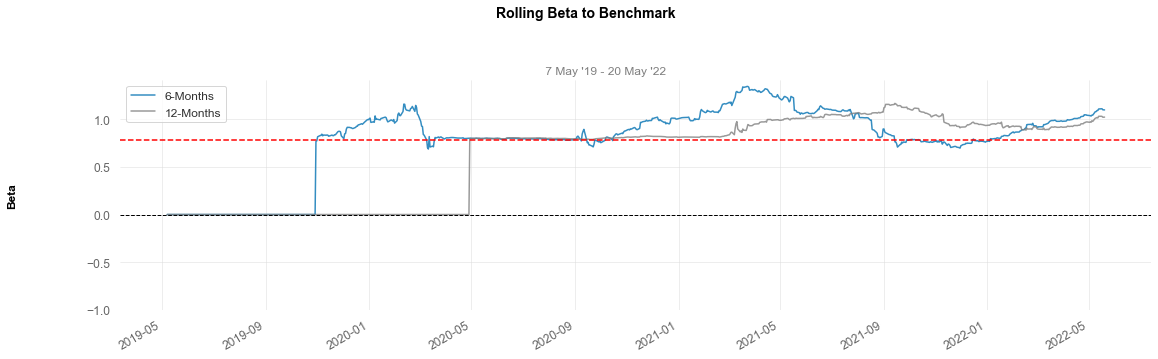

In [5]:
lookback = '4y'
rolling = 126
figsize = (16,5)
pyportlib.plots.rolling_beta(ptf_rets, bench_rets, lookback=lookback, figsize=figsize)

## Rolling Kurtosis

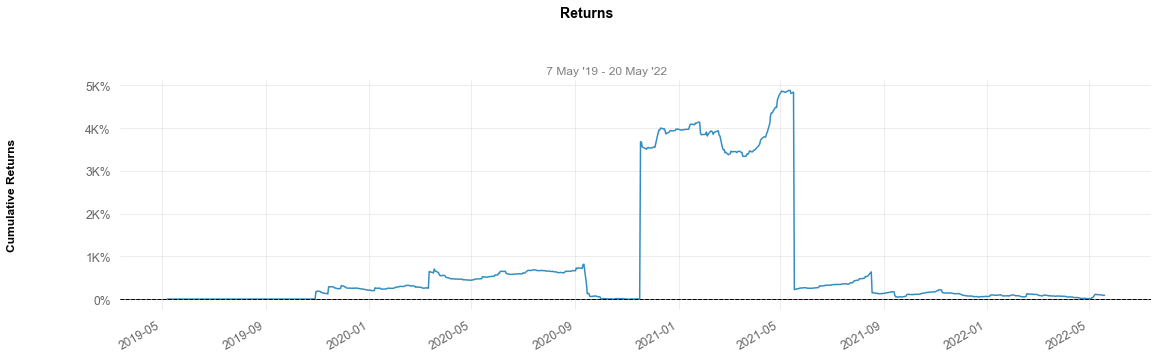

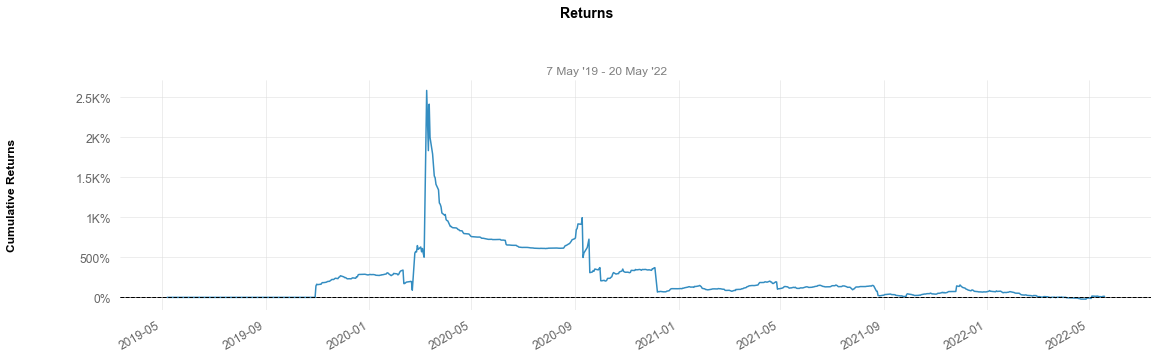

In [6]:
pyportlib.plots.rolling_kurtosis(ptf_rets, lookback=lookback, rolling_period=rolling, figsize=figsize)
pyportlib.plots.rolling_kurtosis(bench_rets, lookback=lookback, rolling_period=rolling, figsize=figsize)

## Rolling Skewness

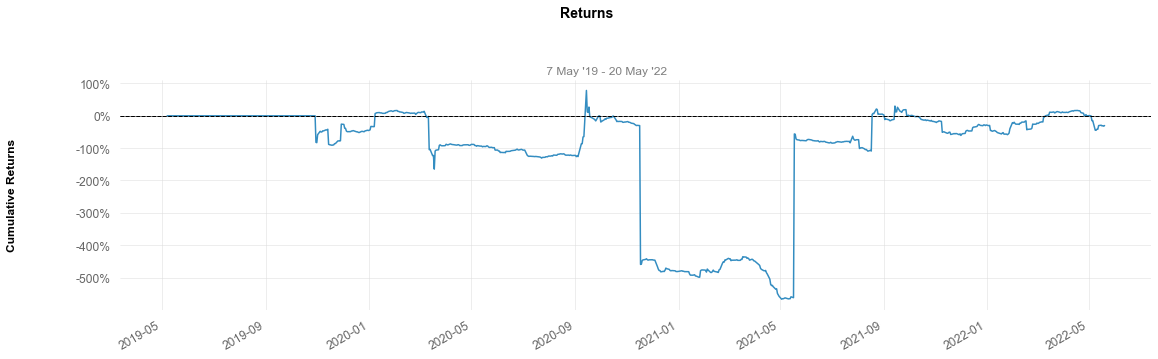

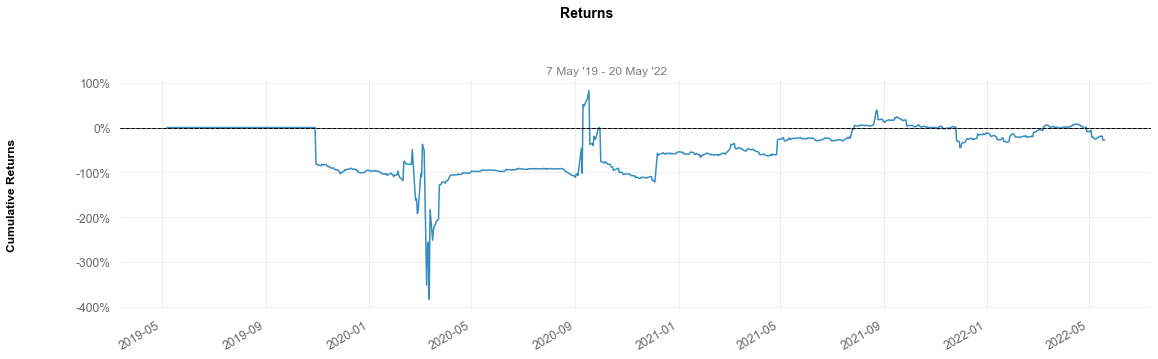

In [7]:
pyportlib.plots.rolling_skew(ptf_rets, lookback=lookback, rolling_period=rolling, figsize=figsize)
pyportlib.plots.rolling_skew(bench_rets, lookback=lookback, rolling_period=rolling, figsize=figsize)

## Rolling Annualized Volatility

2022-05-22 12:21:43,431:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl


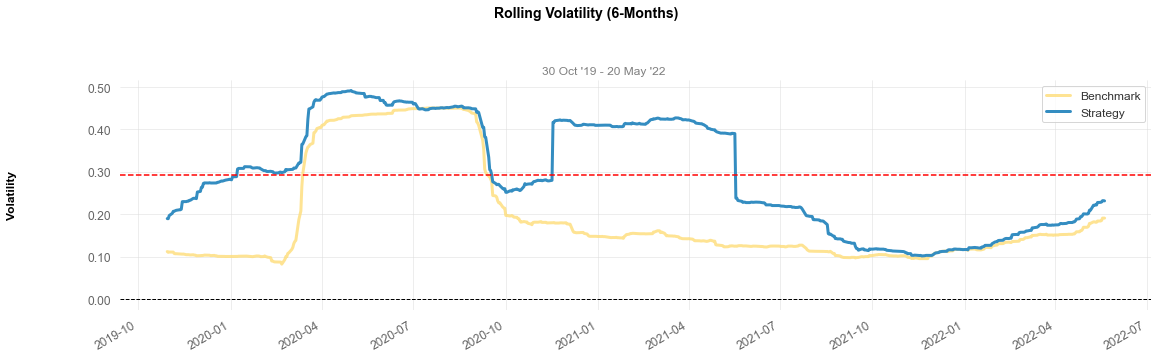

In [8]:
pyportlib.plots.rolling_vol(ptf, lookback=lookback, benchmark=benchmark, figsize=figsize, lw=3)

## Per Position Volatility
#### of every position ever traded in portfolio

KBWY


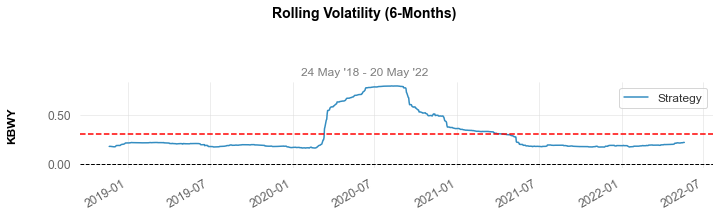

TCPC


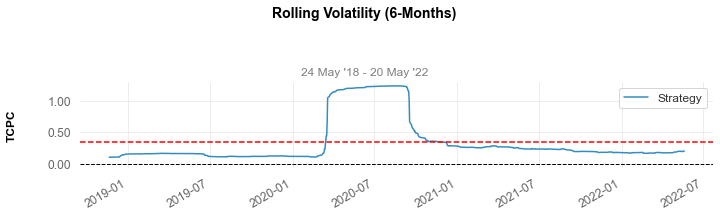

VAB.TO


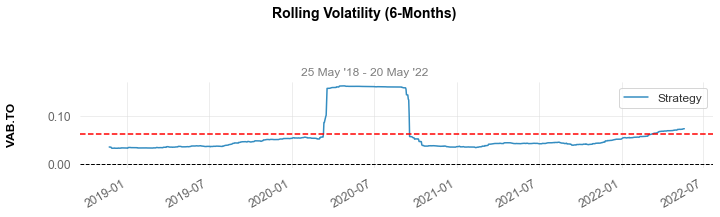

VDY.TO


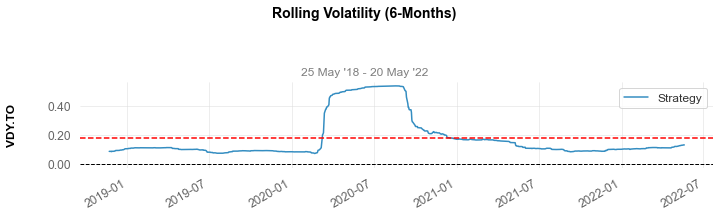

PFE


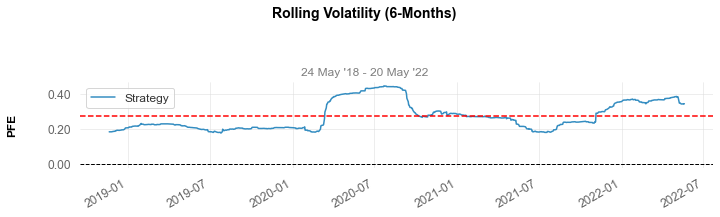

AAPL


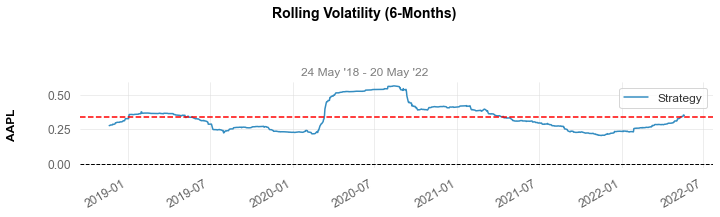

PPL.TO


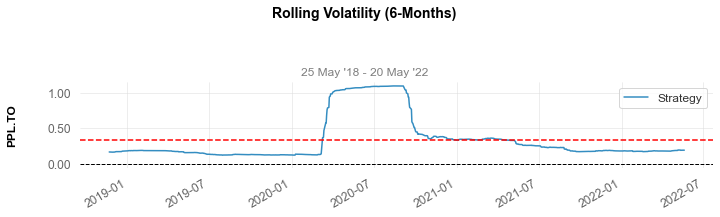

BTCC.B.TO


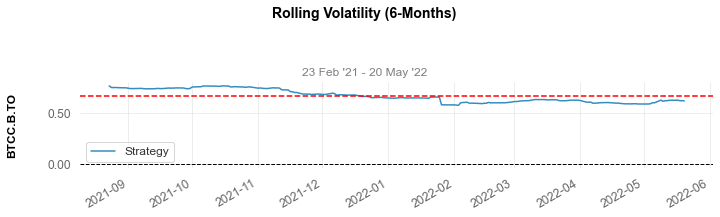

LIT


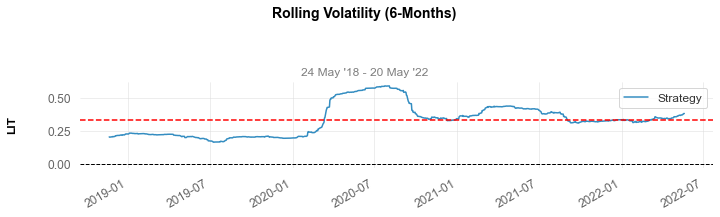

NA.TO


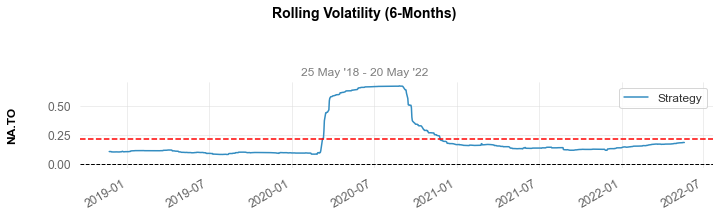

NWH.UN.TO


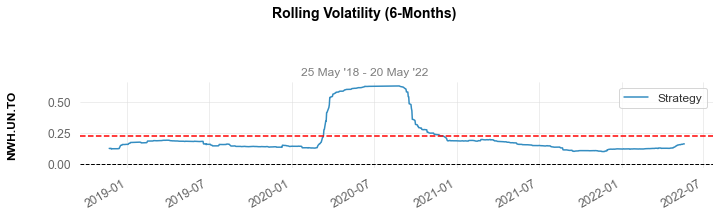

BPY.UN.TO
GME


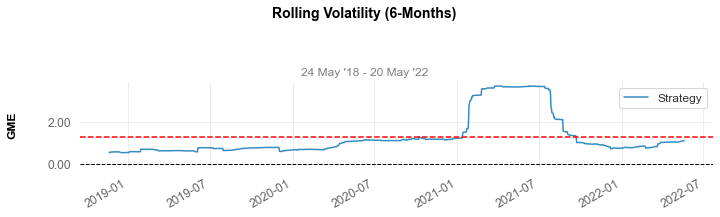

CLVS


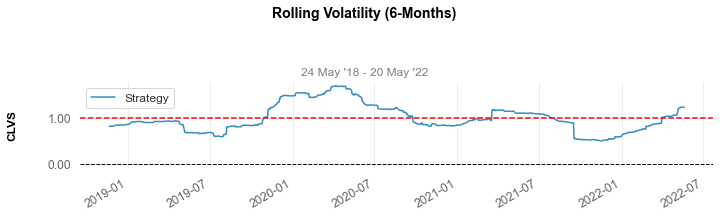

HTGC


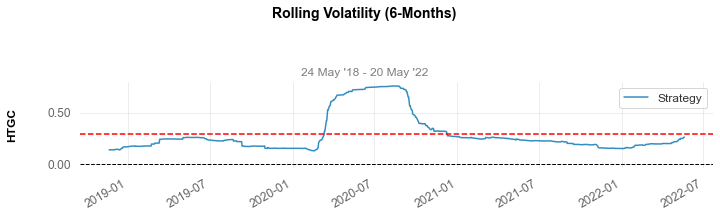

FSZ.TO


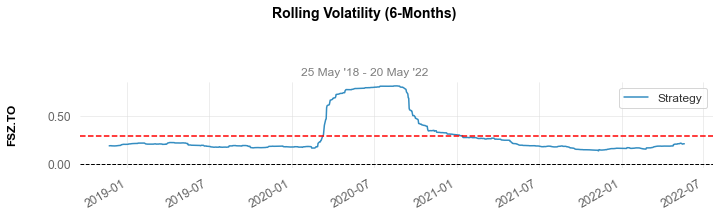

LPTX


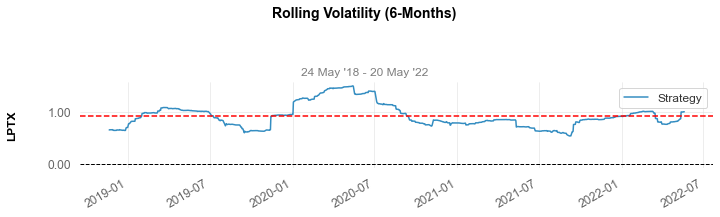

ZJK.TO


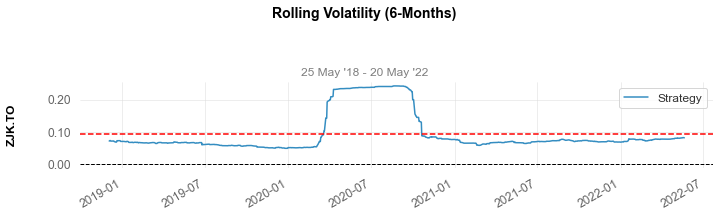

ABT


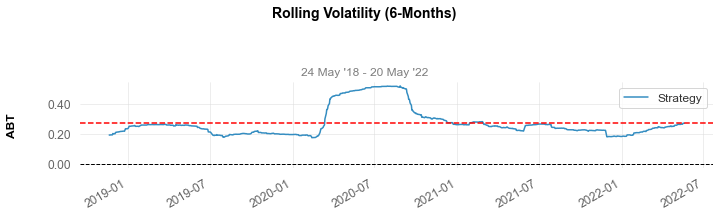

TD.TO


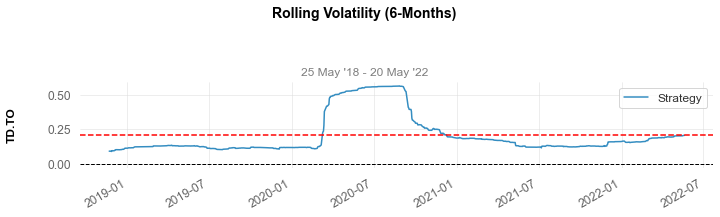

CLDX


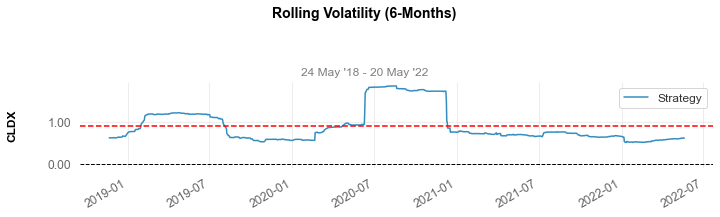

FOOD.TO


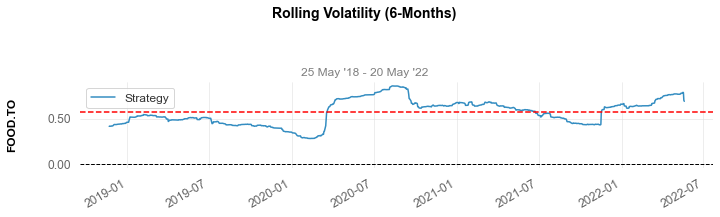

TM


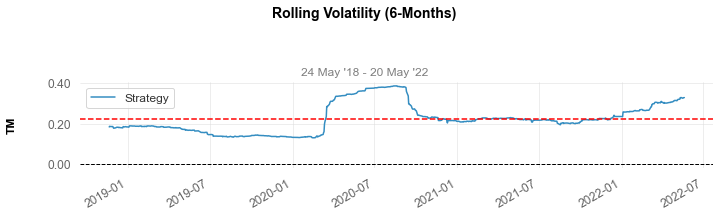

VBU.TO


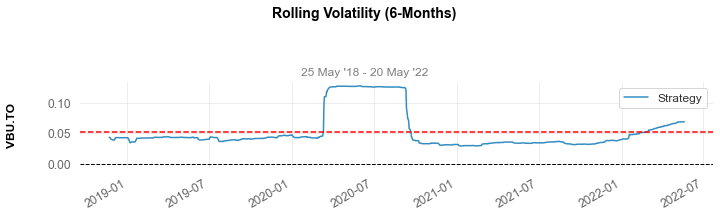

SKYY


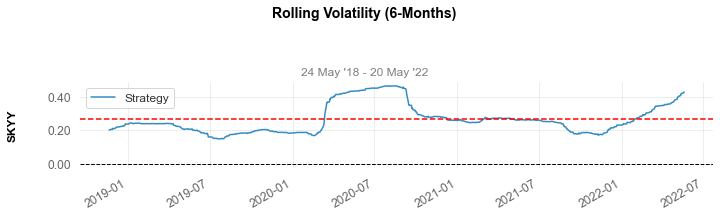

MRK


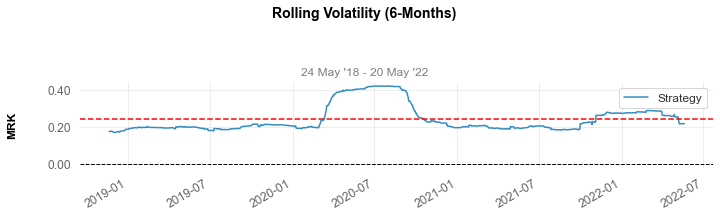

EXAS


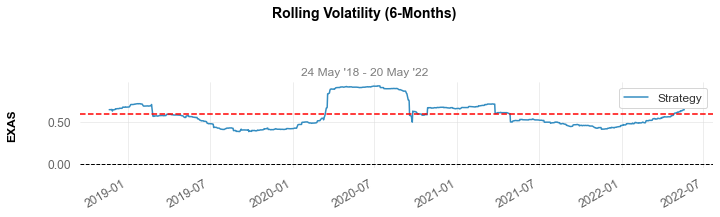

SH


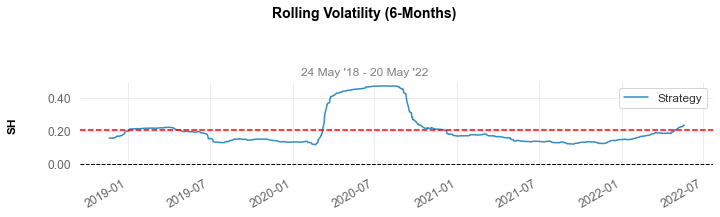

QBR.B.TO


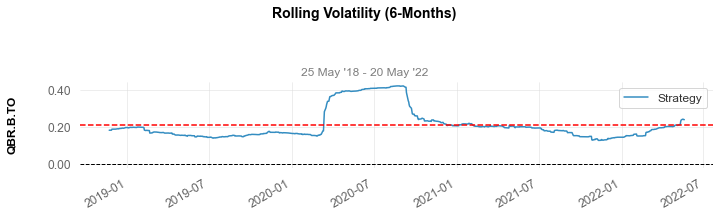

MSFT


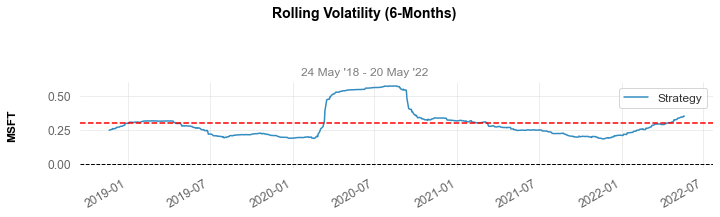

FLT.VN


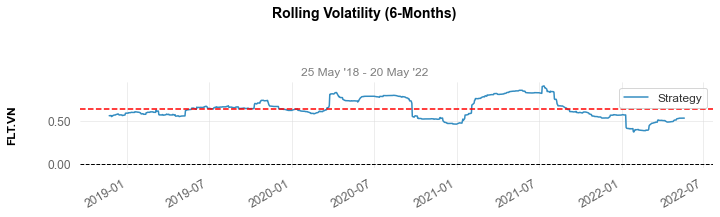

VSB.TO


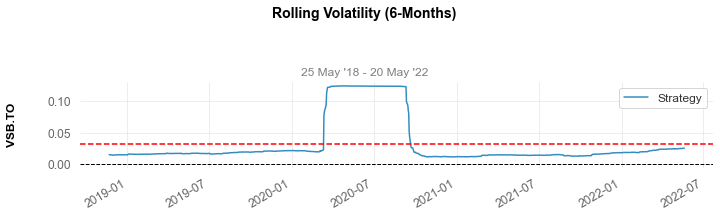

VNQ


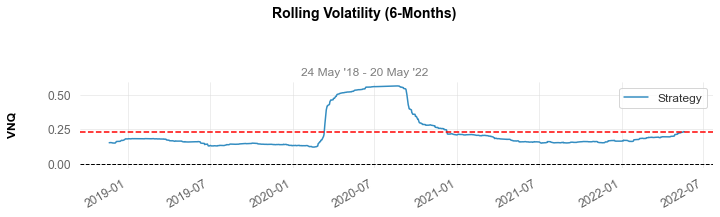

VOOV


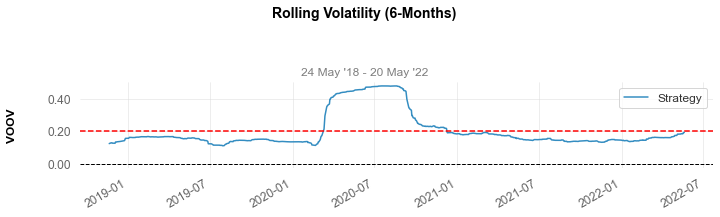

LGND


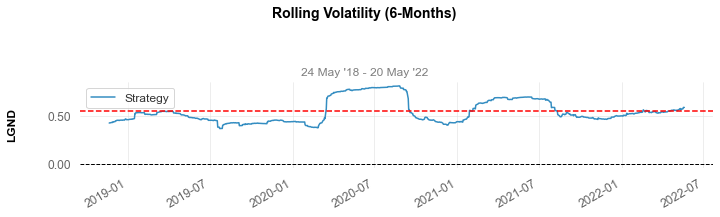

LQD


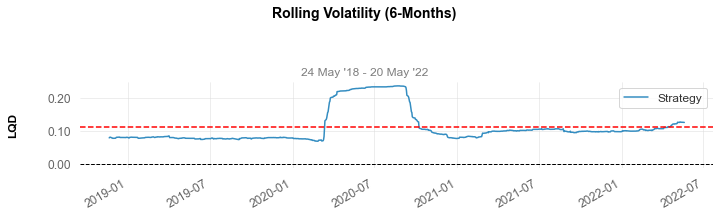

VIRT


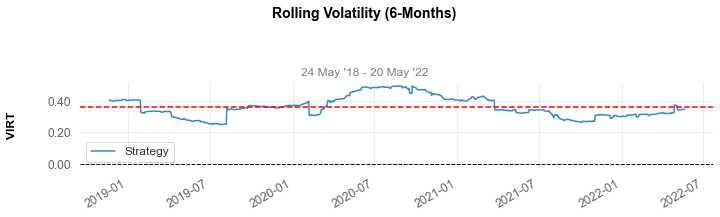

SLV


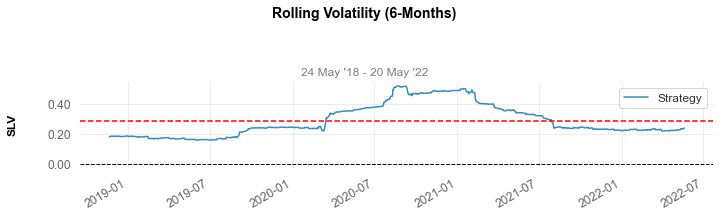

KBWD


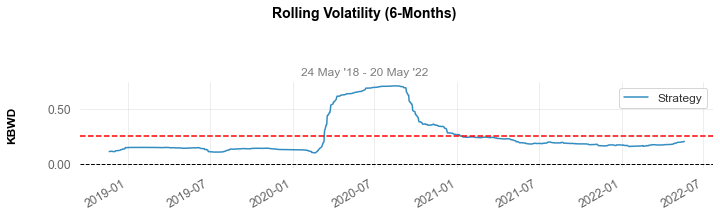

OUSA


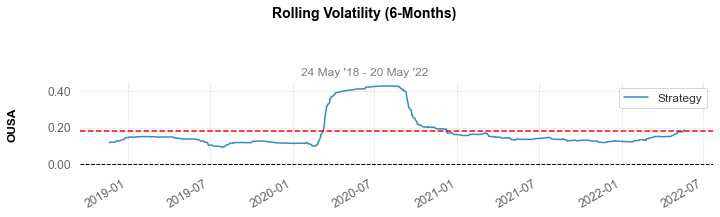

T.TO


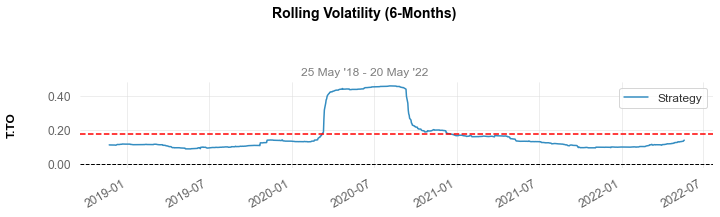

SRU.UN.TO


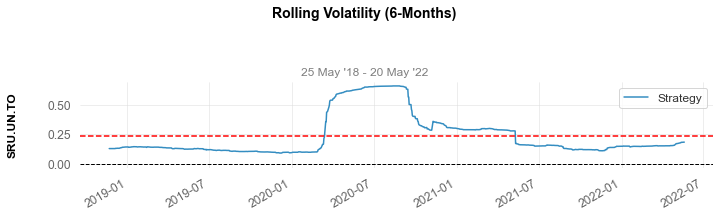

BCLI


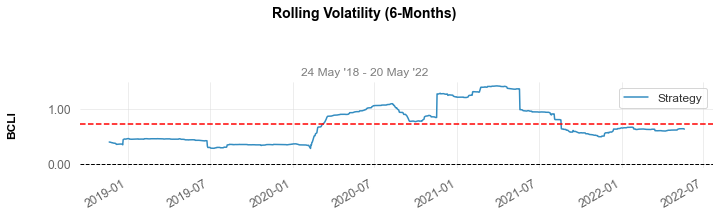

GRT.UN.TO


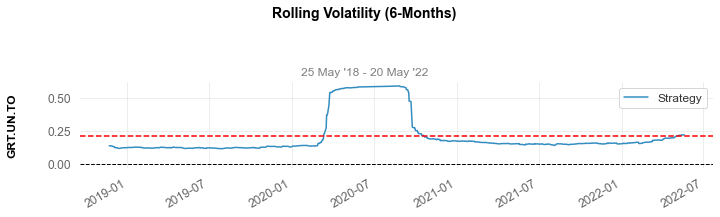

MFC.TO


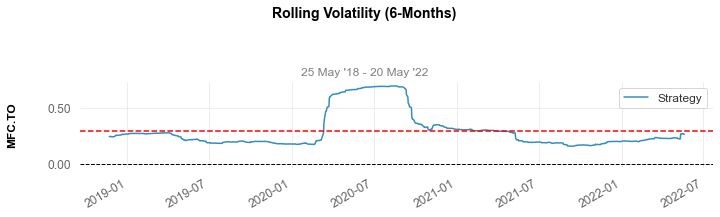

AQN.TO


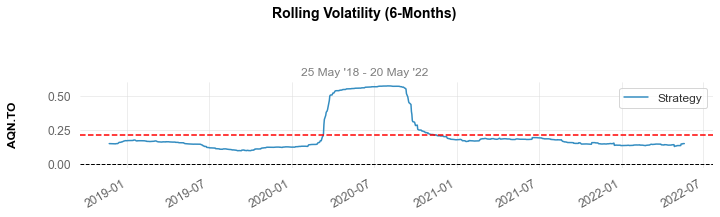

SCYX


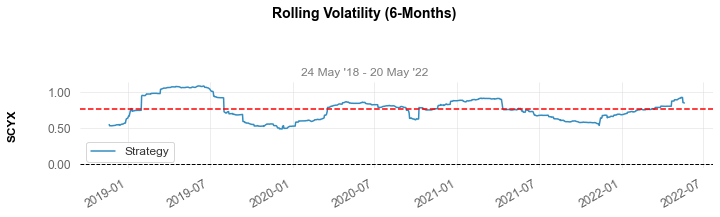

BNS.TO


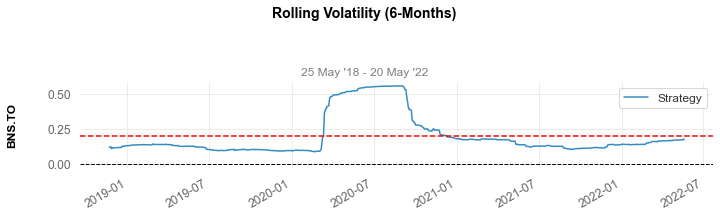

BGCP


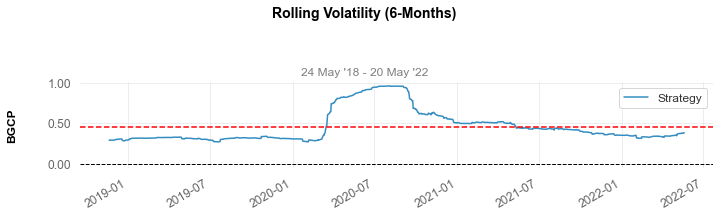

BIP.UN.TO


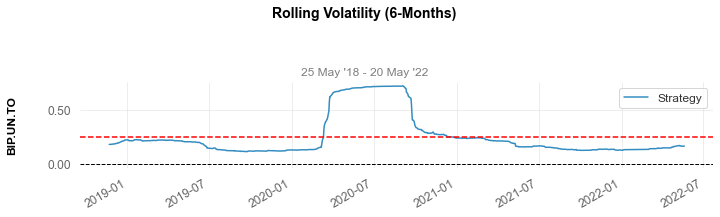

XIU.TO


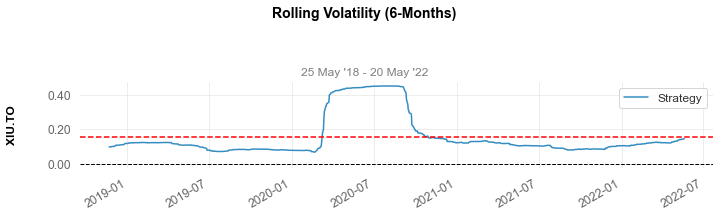

VOO


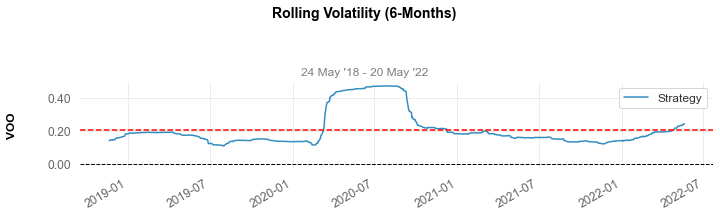

XDV.TO


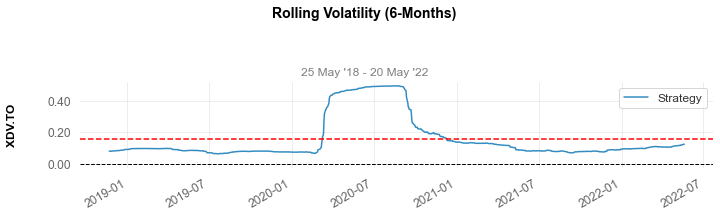

VB


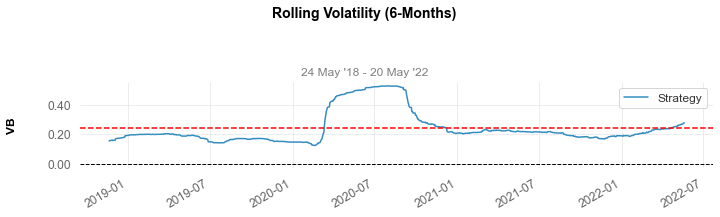

APO


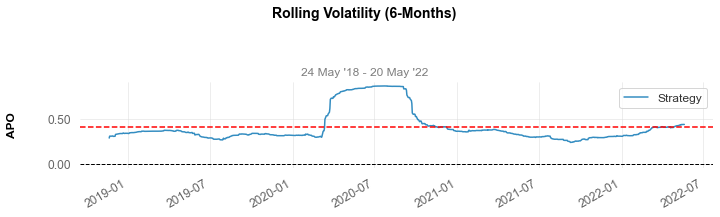

NOU.VN


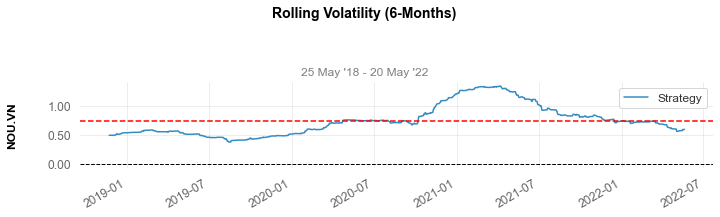

AQN


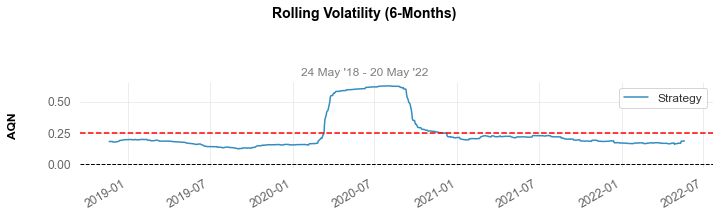

SLRC


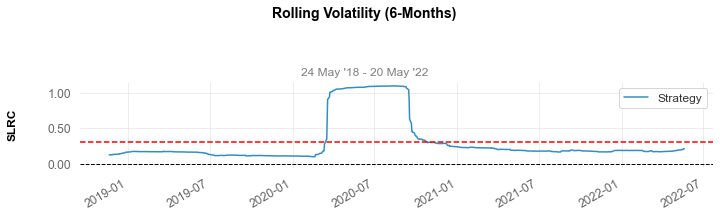

VO


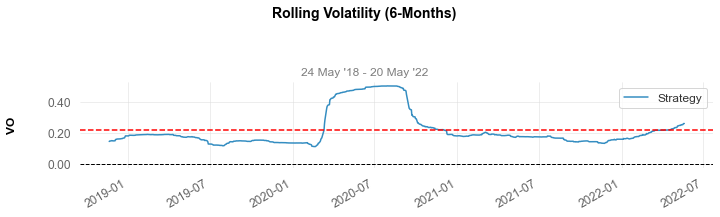

IBB


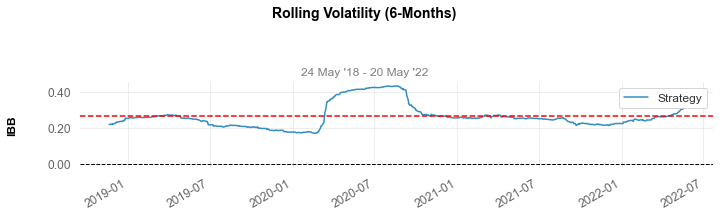

CDZ.TO


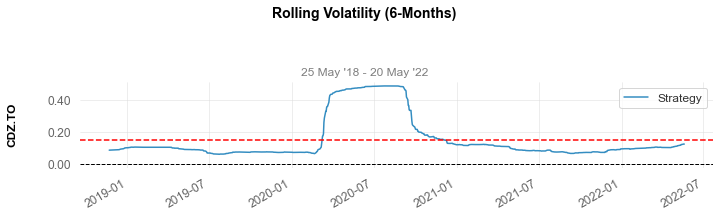

ARKF


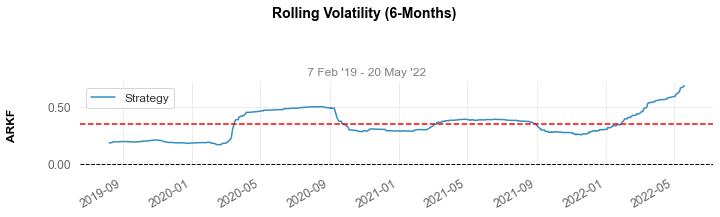

PLTR


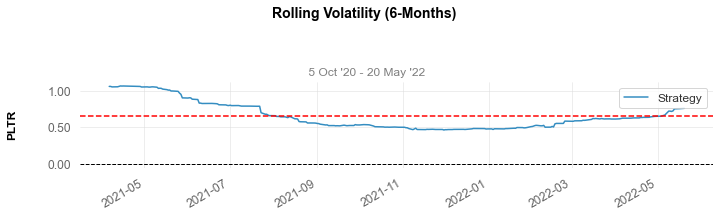

ISTB


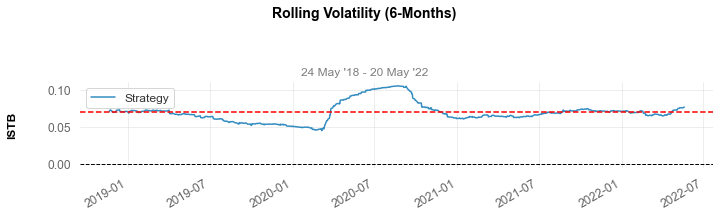

EXEL


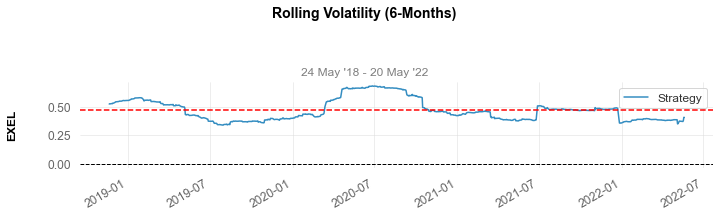

In [9]:
for pos in ptf.positions.values():
    print(pos.ticker)
    if not pos.prices.empty:
        pyportlib.plots.rolling_vol(pos, lookback=lookback, ylabel=pos.ticker)

## All positions historic contribution to portfolio volatility

In [10]:
# for pos in ptf.positions.values():
#     pond_vol = (rolling_vol[pos.ticker] * pos.quantities * pos.prices)
#     pond_vol.name = pos.ticker
#     pond_vol.plot(legend=True, figsize=figsize)

## Correlations

<AxesSubplot:>

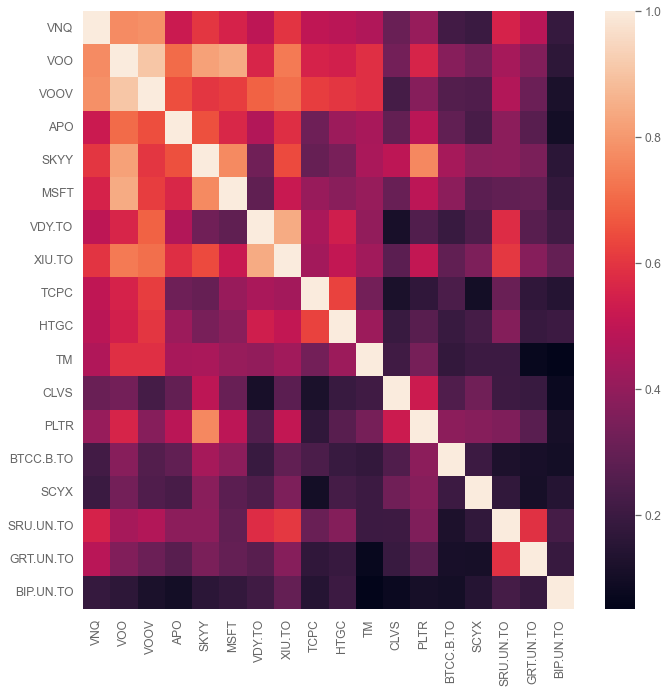

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(11,11))
sns.heatmap(pyportlib.stats.cluster_corr(ptf.corr()))